# PART B: UNSUPERVISED

## Name: Haaris Bin Sulaiman
## Class: DAAA/FT/2A/01
## Admin No: 2112815

## IMPORTING

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

In [10]:
df = pd.read_csv('Company_Employee.csv')

In [11]:
df.head()

Age  Gender     BusinessTravel            Job Function  \
0   41  Female      Travel_Rarely                   Sales   
1   49    Male  Travel_Frequently  Research & Development   
2   37    Male      Travel_Rarely  Research & Development   
3   33  Female  Travel_Frequently  Research & Development   
4   27    Male      Travel_Rarely  Research & Development   

   Distance Between Company and Home (KM)  \
0                                       1   
1                                       8   
2                                       2   
3                                       3   
4                                       2   

   Education (1 is lowest, 5 is highest)  \
0                                      2   
1                                      1   
2                                      2   
3                                      4   
4                                      1   

   Job Satisfaction (1 is lowest, 4 is highest) MaritalStatus  Salary ($)  \
0                                             4        Single        5993   
1                                             2       Married        5130   
2                                             3        Single        2090   
3                                             3       Married        2909   
4                                             2       Married        3468   

   Performance Rating (1 is lowest, 4 is highest)  \
0                                               3   
1                                               4   
2                                               3   
3                                               3   
4                                               3   

   Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
0                                          1                          6   
1                                          3                         10   
2                                          3                          0   
3                                          3                          8   
4                                          3                          2   

  Resign Status  
0           Yes  
1            No  
2           Yes  
3            No  
4            No

## DATA EXPLORATION

In [12]:
df.shape

(1470, 13)

In [13]:
df.dtypes

Age                                                int64
Gender                                            object
BusinessTravel                                    object
Job Function                                      object
Distance Between Company and Home (KM)             int64
Education (1 is lowest, 5 is highest)              int64
Job Satisfaction (1 is lowest, 4 is highest)       int64
MaritalStatus                                     object
Salary ($)                                         int64
Performance Rating (1 is lowest, 4 is highest)     int64
Work Life Balance (1 is worst, 4 is best)          int64
Length of Service (Years)                          int64
Resign Status                                     object
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             1470 non-null   int64 
 1   Gender                                          1470 non-null   object
 2   BusinessTravel                                  1470 non-null   object
 3   Job Function                                    1470 non-null   object
 4   Distance Between Company and Home (KM)          1470 non-null   int64 
 5   Education (1 is lowest, 5 is highest)           1470 non-null   int64 
 6   Job Satisfaction (1 is lowest, 4 is highest)    1470 non-null   int64 
 7   MaritalStatus                                   1470 non-null   object
 8   Salary ($)                                      1470 non-null   int64 
 9   Performance Rating (1 is lowest, 4 is highest)  1470

In [15]:
df.describe()

Age  Distance Between Company and Home (KM)  \
count  1470.000000                             1470.000000   
mean     36.923810                                9.192517   
std       9.135373                                8.106864   
min      18.000000                                1.000000   
25%      30.000000                                2.000000   
50%      36.000000                                7.000000   
75%      43.000000                               14.000000   
max      60.000000                               29.000000   

       Education (1 is lowest, 5 is highest)  \
count                            1470.000000   
mean                                2.912925   
std                                 1.024165   
min                                 1.000000   
25%                                 2.000000   
50%                                 3.000000   
75%                                 4.000000   
max                                 5.000000   

       Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
count                                   1470.000000   1470.000000   
mean                                       2.728571   6502.931293   
std                                        1.102846   4707.956783   
min                                        1.000000   1009.000000   
25%                                        2.000000   2911.000000   
50%                                        3.000000   4919.000000   
75%                                        4.000000   8379.000000   
max                                        4.000000  19999.000000   

       Performance Rating (1 is lowest, 4 is highest)  \
count                                     1470.000000   
mean                                         3.153741   
std                                          0.360824   
min                                          3.000000   
25%                                          3.000000   
50%                                          3.000000   
75%                                          3.000000   
max                                          4.000000   

       Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  
count                                1470.000000                1470.000000  
mean                                    2.761224                   7.008163  
std                                     0.706476                   6.126525  
min                                     1.000000                   0.000000  
25%                                     2.000000                   3.000000  
50%                                     3.000000                   5.000000  
75%                                     3.000000                   9.000000  
max                                     4.000000                  40.000000

## DATA CLEANING

In [16]:
df.isna().sum()

Age                                               0
Gender                                            0
BusinessTravel                                    0
Job Function                                      0
Distance Between Company and Home (KM)            0
Education (1 is lowest, 5 is highest)             0
Job Satisfaction (1 is lowest, 4 is highest)      0
MaritalStatus                                     0
Salary ($)                                        0
Performance Rating (1 is lowest, 4 is highest)    0
Work Life Balance (1 is worst, 4 is best)         0
Length of Service (Years)                         0
Resign Status                                     0
dtype: int64

In [17]:
df.head(2)

Age  Gender     BusinessTravel            Job Function  \
0   41  Female      Travel_Rarely                   Sales   
1   49    Male  Travel_Frequently  Research & Development   

   Distance Between Company and Home (KM)  \
0                                       1   
1                                       8   

   Education (1 is lowest, 5 is highest)  \
0                                      2   
1                                      1   

   Job Satisfaction (1 is lowest, 4 is highest) MaritalStatus  Salary ($)  \
0                                             4        Single        5993   
1                                             2       Married        5130   

   Performance Rating (1 is lowest, 4 is highest)  \
0                                               3   
1                                               4   

   Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
0                                          1                          6   
1                                          3                         10   

  Resign Status  
0           Yes  
1            No

## EXPLORY DATA ANALYSIS

In [18]:
numerical_cols = df.select_dtypes(include=['int64']).columns
df.describe()

Age  Distance Between Company and Home (KM)  \
count  1470.000000                             1470.000000   
mean     36.923810                                9.192517   
std       9.135373                                8.106864   
min      18.000000                                1.000000   
25%      30.000000                                2.000000   
50%      36.000000                                7.000000   
75%      43.000000                               14.000000   
max      60.000000                               29.000000   

       Education (1 is lowest, 5 is highest)  \
count                            1470.000000   
mean                                2.912925   
std                                 1.024165   
min                                 1.000000   
25%                                 2.000000   
50%                                 3.000000   
75%                                 4.000000   
max                                 5.000000   

       Job Satisfaction (1 is lowest, 4 is highest)    Salary ($)  \
count                                   1470.000000   1470.000000   
mean                                       2.728571   6502.931293   
std                                        1.102846   4707.956783   
min                                        1.000000   1009.000000   
25%                                        2.000000   2911.000000   
50%                                        3.000000   4919.000000   
75%                                        4.000000   8379.000000   
max                                        4.000000  19999.000000   

       Performance Rating (1 is lowest, 4 is highest)  \
count                                     1470.000000   
mean                                         3.153741   
std                                          0.360824   
min                                          3.000000   
25%                                          3.000000   
50%                                          3.000000   
75%                                          3.000000   
max                                          4.000000   

       Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  
count                                1470.000000                1470.000000  
mean                                    2.761224                   7.008163  
std                                     0.706476                   6.126525  
min                                     1.000000                   0.000000  
25%                                     2.000000                   3.000000  
50%                                     3.000000                   5.000000  
75%                                     3.000000                   9.000000  
max                                     4.000000                  40.000000

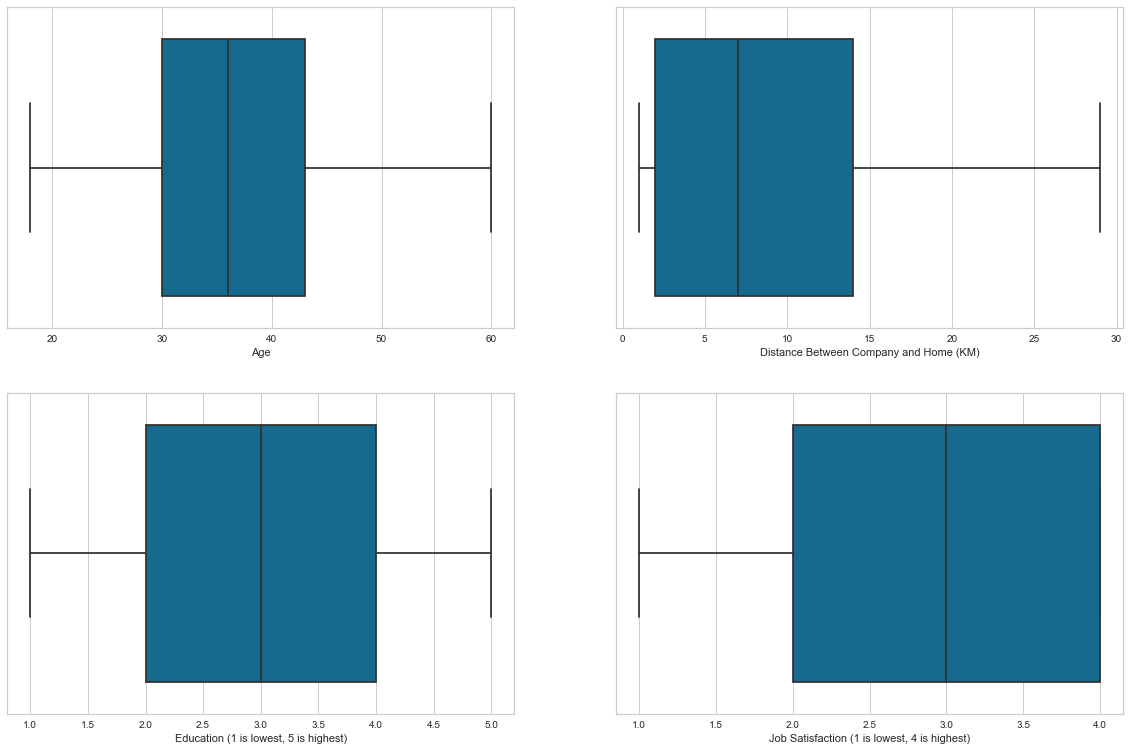

In [19]:
fig, (ax1, ax2) = plt.subplots(2,2, figsize=(20, 13))
sns.boxplot(x ='Age', data=df, ax=ax1[0])
sns.boxplot(x ='Distance Between Company and Home (KM)', data=df, ax=ax1[1])
sns.boxplot(x ='Education (1 is lowest, 5 is highest)', data=df, ax=ax2[0])
sns.boxplot(x ='Job Satisfaction (1 is lowest, 4 is highest)', data=df, ax=ax2[1])
plt.show()

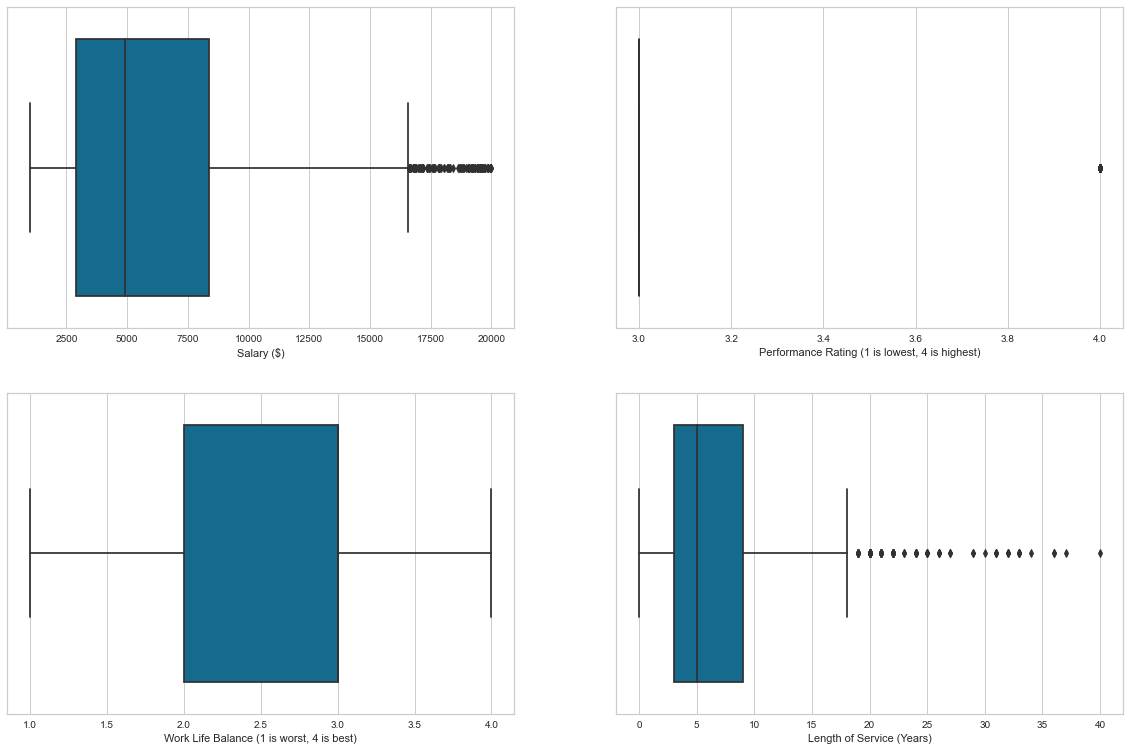

In [20]:
fig, (ax1, ax2) = plt.subplots(2,2, figsize=(20, 13))
sns.boxplot(x ='Salary ($)', data=df, ax=ax1[0])
sns.boxplot(x ='Performance Rating (1 is lowest, 4 is highest)', data=df, ax=ax1[1])
sns.boxplot(x ='Work Life Balance (1 is worst, 4 is best)', data=df, ax=ax2[0])
sns.boxplot(x ='Length of Service (Years)', data=df, ax=ax2[1])
plt.show()

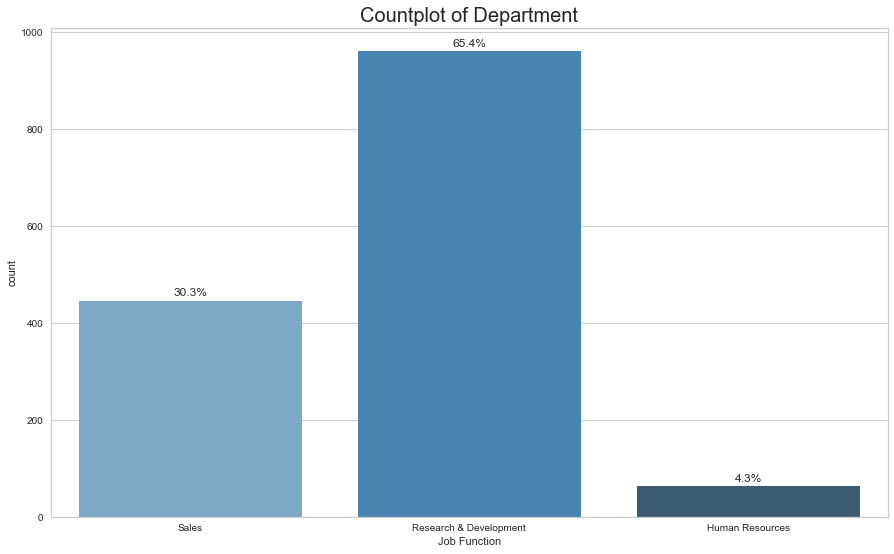

In [21]:
plt.figure(figsize = (15,9))
total = float(len(df))
ax = sns.countplot(x = 'Job Function', data = df, palette="Blues_d")
plt.title('Countplot of Department', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.4
    y = p.get_height()
    ax.annotate(percentage, (x, y + 10),ha='center')
 

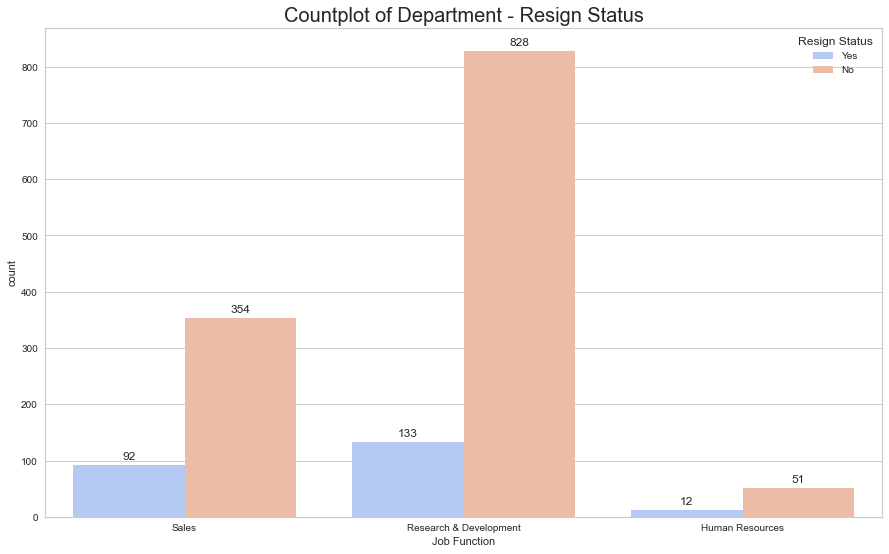

In [22]:
plt.figure(figsize = (15,9))
total = [991, 991, 446, 446, 63, 63]
total = len(df['Job Function'])
ax = sns.countplot(x = 'Job Function', data = df, palette="coolwarm", hue = 'Resign Status')
plt.title('Countplot of Department - Resign Status', fontsize=20)
for p in ax.patches:
    percentage = p.get_height()
    x = p.get_x() + p.get_width() -0.2
    y = p.get_height()
    ax.annotate(percentage, (x, y + 10),ha='center')
p

Text(0.5, 1.02, 'Pairwise Relationship Plot Differentiated by Resign Status')

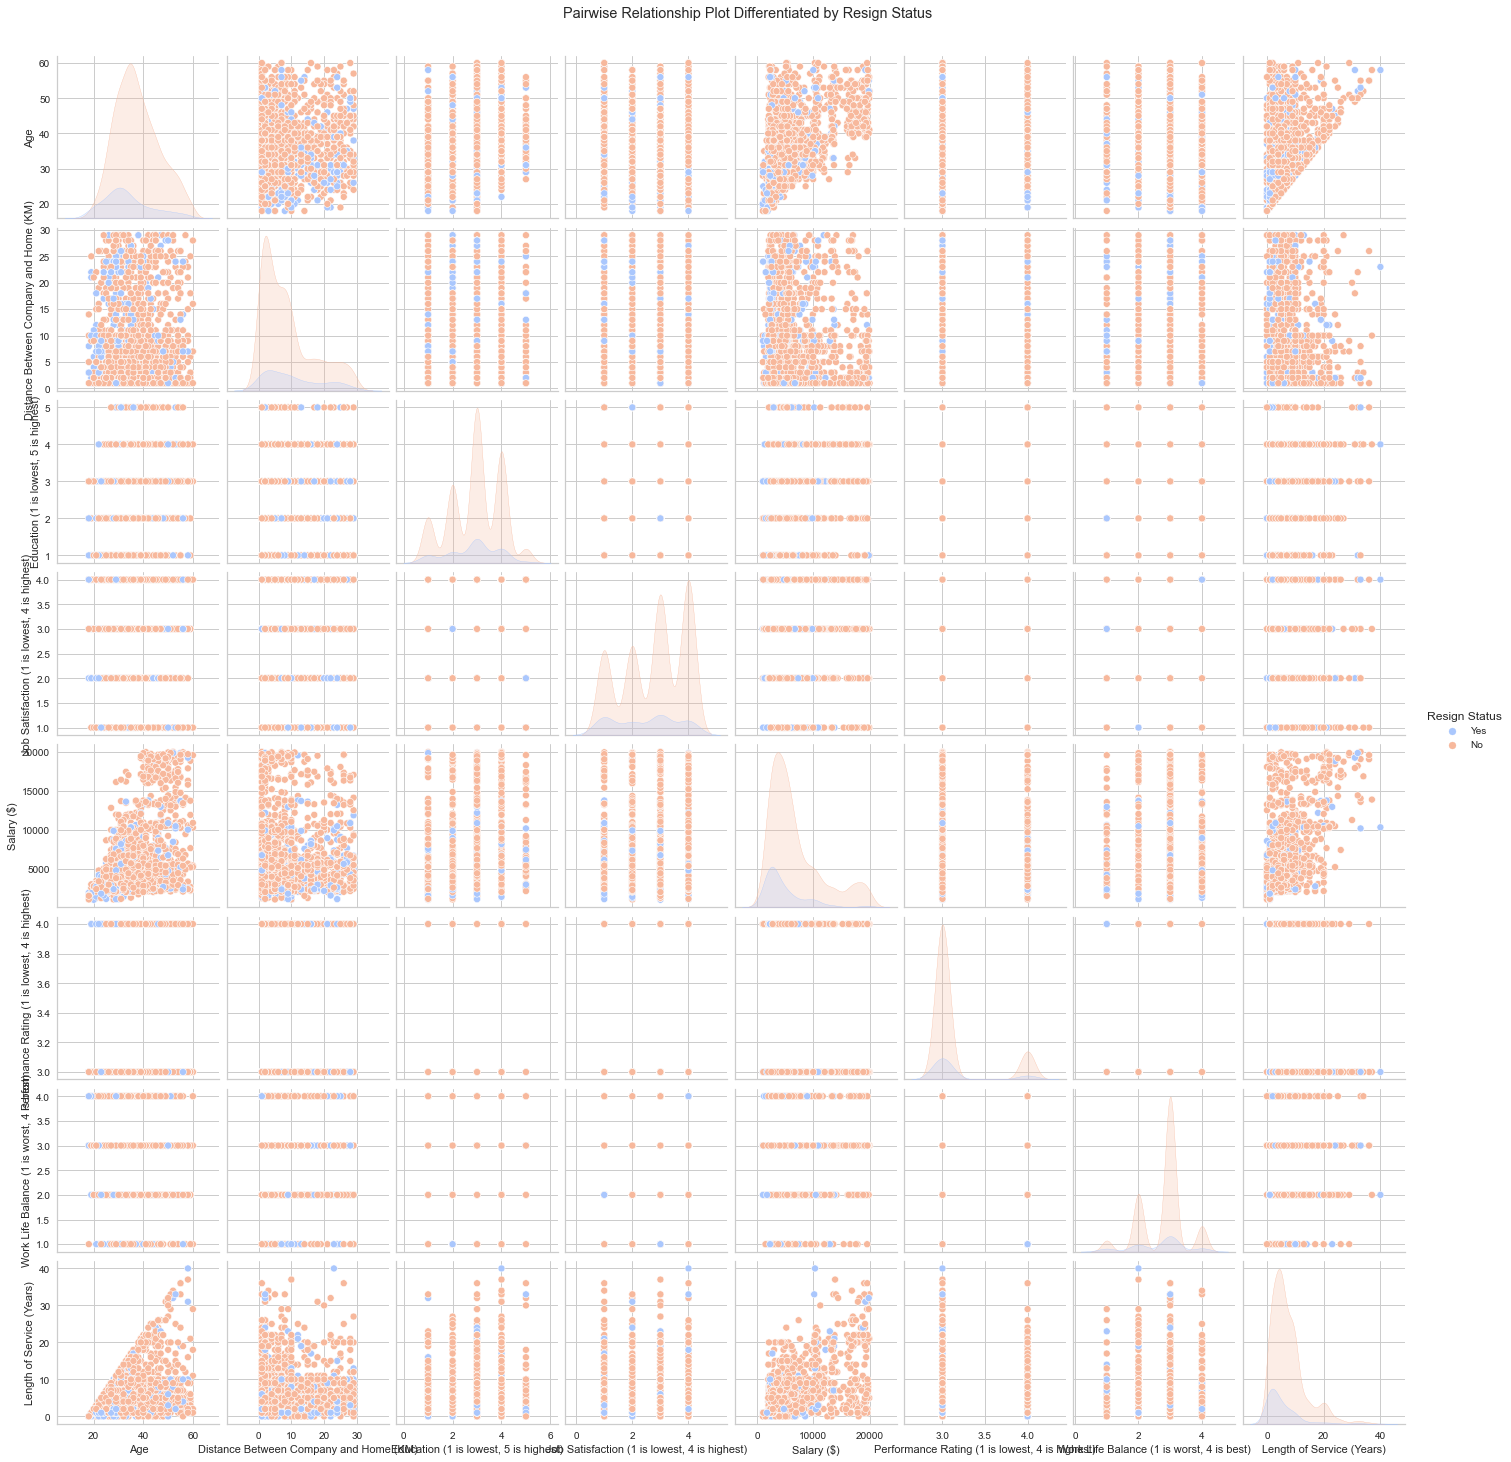

In [23]:
sns.pairplot(df, hue='Resign Status', palette='coolwarm').fig.suptitle('Pairwise Relationship Plot Differentiated by Resign Status', y=1.02)

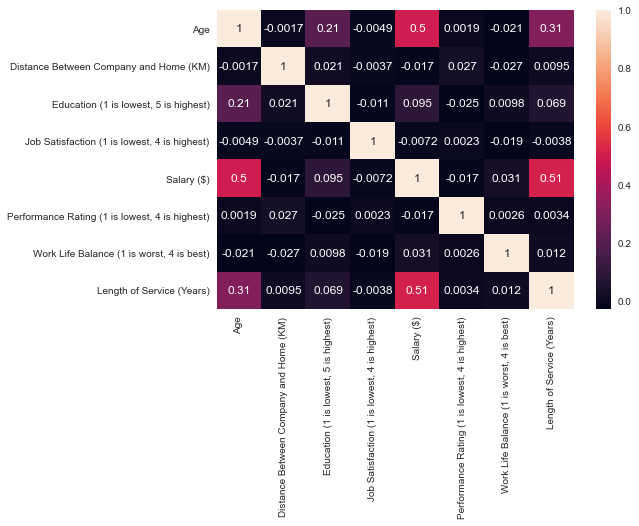

In [24]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## ONE HOT ENCODING

In [25]:
df = pd.get_dummies(df)

In [26]:
df.head()

Age  Distance Between Company and Home (KM)  \
0   41                                       1   
1   49                                       8   
2   37                                       2   
3   33                                       3   
4   27                                       2   

   Education (1 is lowest, 5 is highest)  \
0                                      2   
1                                      1   
2                                      2   
3                                      4   
4                                      1   

   Job Satisfaction (1 is lowest, 4 is highest)  Salary ($)  \
0                                             4        5993   
1                                             2        5130   
2                                             3        2090   
3                                             3        2909   
4                                             2        3468   

   Performance Rating (1 is lowest, 4 is highest)  \
0                                               3   
1                                               4   
2                                               3   
3                                               3   
4                                               3   

   Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
0                                          1                          6   
1                                          3                         10   
2                                          3                          0   
3                                          3                          8   
4                                          3                          2   

   Gender_Female  Gender_Male  ...  BusinessTravel_Travel_Frequently  \
0              1            0  ...                                 0   
1              0            1  ...                                 1   
2              0            1  ...                                 0   
3              1            0  ...                                 1   
4              0            1  ...                                 0   

   BusinessTravel_Travel_Rarely  Job Function_Human Resources  \
0                             1                             0   
1                             0                             0   
2                             1                             0   
3                             0                             0   
4                             1                             0   

   Job Function_Research & Development  Job Function_Sales  \
0                                    0                   1   
1                                    1                   0   
2                                    1                   0   
3                                    1                   0   
4                                    1                   0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                       0                      0                     1   
1                       0                      1                     0   
2                       0                      0                     1   
3                       0                      1                     0   
4                       0                      1                     0   

   Resign Status_No  Resign Status_Yes  
0                 0                  1  
1                 1                  0  
2                 0                  1  
3                 1                  0  
4                 1                  0  

[5 rows x 21 columns]

## FEATURE SCALING 

In [27]:
from sklearn import preprocessing

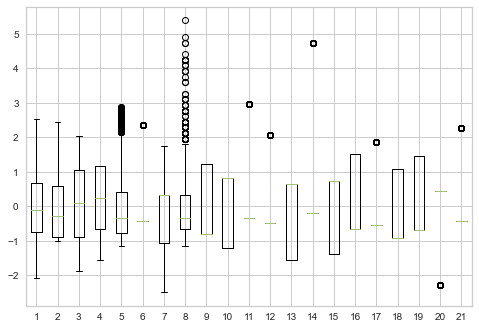

In [28]:
# standardization
std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(df)
d = pd.DataFrame(df_std, columns = df.columns)
plt.boxplot(df_std)
plt.show()

In [29]:
d

Age  Distance Between Company and Home (KM)  \
0     0.446350                               -1.010909   
1     1.322365                               -0.147150   
2     0.008343                               -0.887515   
3    -0.429664                               -0.764121   
4    -1.086676                               -0.887515   
...        ...                                     ...   
1465 -0.101159                                1.703764   
1466  0.227347                               -0.393938   
1467 -1.086676                               -0.640727   
1468  1.322365                               -0.887515   
1469 -0.320163                               -0.147150   

      Education (1 is lowest, 5 is highest)  \
0                                 -0.891688   
1                                 -1.868426   
2                                 -0.891688   
3                                  1.061787   
4                                 -1.868426   
...                                     ...   
1465                              -0.891688   
1466                              -1.868426   
1467                               0.085049   
1468                               0.085049   
1469                               0.085049   

      Job Satisfaction (1 is lowest, 4 is highest)  Salary ($)  \
0                                         1.153254   -0.108350   
1                                        -0.660853   -0.291719   
2                                         0.246200   -0.937654   
3                                         0.246200   -0.763634   
4                                        -0.660853   -0.644858   
...                                            ...         ...   
1465                                      1.153254   -0.835451   
1466                                     -1.567907    0.741140   
1467                                     -0.660853   -0.076690   
1468                                     -0.660853   -0.236474   
1469                                      0.246200   -0.445978   

      Performance Rating (1 is lowest, 4 is highest)  \
0                                          -0.426230   
1                                           2.346151   
2                                          -0.426230   
3                                          -0.426230   
4                                          -0.426230   
...                                              ...   
1465                                       -0.426230   
1466                                       -0.426230   
1467                                        2.346151   
1468                                       -0.426230   
1469                                       -0.426230   

      Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
0                                     -2.493820                  -0.164613   
1                                      0.338096                   0.488508   
2                                      0.338096                  -1.144294   
3                                      0.338096                   0.161947   
4                                      0.338096                  -0.817734   
...                                         ...                        ...   
1465                                   0.338096                  -0.327893   
1466                                   0.338096                  -0.001333   
1467                                   0.338096                  -0.164613   
1468                                  -1.077862                   0.325228   
1469                                   1.754054                  -0.491174   

      Gender_Female  Gender_Male  ...  BusinessTravel_Travel_Frequently  \
0          1.224745    -1.224745  ...                         -0.481859   
1         -0.816497     0.816497  ...                          2.075297   
2         -0.816497     0.816497  ...                         -0.481859   
3          1.224745    -1.224745  ...         

# PRINCIPAL COMPONENT ANALYSIS

In [30]:
pca = PCA(n_components=21).fit(d)
pca_samples = pca.transform(d)

In [31]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #to show PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    #to show PCA cumulative variance explained
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions
    
    #to show PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions


    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

In [32]:
pca_results = pca_results(d, pca)
pca_results

Eigenvalue  Explained Variance  Cumulative Explained Variance     Age  \
PC 1       2.5455              0.1211                         0.1211 -0.3257   
PC 2       2.0790              0.0989                         0.2201  0.0952   
PC 3       1.9458              0.0926                         0.3127  0.1171   
PC 4       1.8579              0.0884                         0.4011  0.1034   
PC 5       1.5914              0.0757                         0.4768  0.3059   
PC 6       1.5766              0.0750                         0.5518  0.2527   
PC 7       1.2933              0.0615                         0.6134 -0.0247   
PC 8       1.1296              0.0538                         0.6671  0.0421   
PC 9       1.0951              0.0521                         0.7192  0.0283   
PC 10      1.0139              0.0482                         0.7675 -0.0605   
PC 11      0.9996              0.0476                         0.8150  0.0777   
PC 12      0.9804              0.0467                         0.8617 -0.0032   
PC 13      0.9407              0.0448                         0.9065  0.1096   
PC 14      0.9045              0.0430                         0.9495 -0.0438   
PC 15      0.6481              0.0308                         0.9804  0.6839   
PC 16      0.4128              0.0196                         1.0000  0.4566   
PC 17      0.0000              0.0000                         1.0000 -0.0000   
PC 18      0.0000              0.0000                         1.0000 -0.0000   
PC 19      0.0000              0.0000                         1.0000 -0.0000   
PC 20      0.0000              0.0000                         1.0000 -0.0000   
PC 21      0.0000              0.0000                         1.0000 -0.0000   

       Distance Between Company and Home (KM)  \
PC 1                                   0.0474   
PC 2                                   0.0217   
PC 3                                   0.0193   
PC 4                                   0.0132   
PC 5                                   0.1218   
PC 6                                  -0.0390   
PC 7                                   0.0952   
PC 8                                   0.3505   
PC 9                                  -0.1038   
PC 10                                  0.1603   
PC 11                                  0.4861   
PC 12                                 -0.3476   
PC 13                                 -0.6060   
PC 14                                  0.2913   
PC 15                                  0.0479   
PC 16                                 -0.0218   
PC 17                                  0.0000   
PC 18                                 -0.0000   
PC 19                                 -0.0000   
PC 20                                 -0.0000   
PC 21                                 -0.0000   

       Education (1 is lowest, 5 is highest)  \
PC 1                                 -0.0969   
PC 2                                  0.0632   
PC 3                                  0.0587   
PC 4                                  0.0487   
PC 5                                  0.1246   
PC 6                                  0.1597   
PC 7                                 -0.0570   
PC 8                                  0.0970   
PC 9                                  0.1534   
PC 10                                -0.4572   
PC 11                                 0.3947   
PC 12                                -0.4880   
PC 13                                 0.4301   
PC 14                                -0.1207   
PC 15                                -0.3043   
PC 16                                -0.0920   
PC 17                                 0.0000   
PC 18                                -0.0000   
PC 19                                -0.0000   
PC 20                                 0.0000   
PC 21                                -0.0000   

       Job Satisfaction (1 is lowest, 4 is highest)  Salary ($)  \
PC 1                                       

<Figure size 576x396 with 0 Axes>

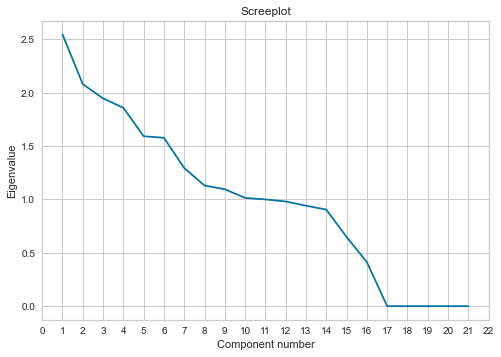

In [33]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

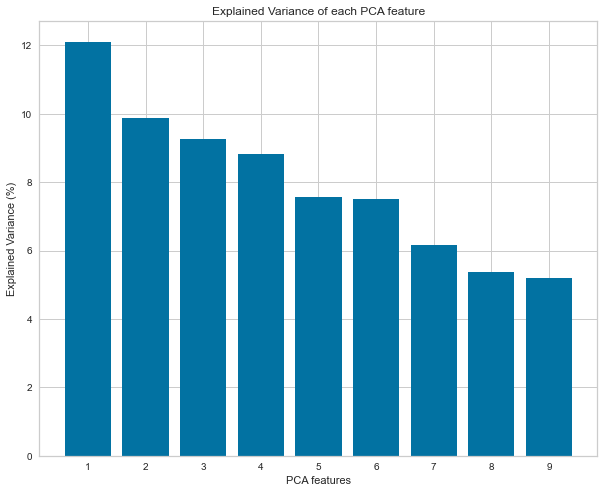

In [34]:
pca = PCA(n_components=9)
p_comps = pca.fit_transform(d)
i = [k for k in range(1, 10)]
plt.figure(figsize=(10,8))
plt.bar(i, pca.explained_variance_ratio_*100)
plt.ylabel('Explained Variance (%)')
plt.xlabel('PCA features')
plt.title('Explained Variance of each PCA feature')
plt.xticks(i)
plt.show()

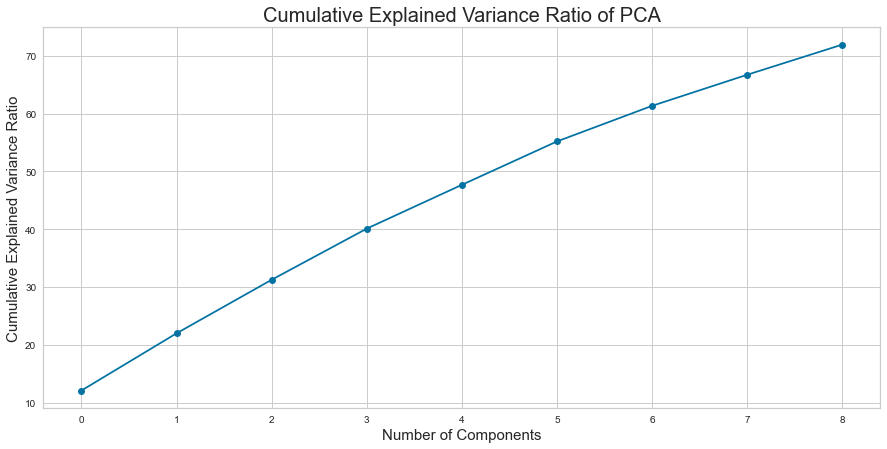

In [35]:
cumsum = np.cumsum(pca.explained_variance_ratio_*100)
plt.figure(figsize=(15,7))
plt.plot(cumsum, 'o-') 
plt.title('Cumulative Explained Variance Ratio of PCA', fontsize=20)
plt.xlabel('Number of Components', fontsize=15)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=15)
plt.show()

In [36]:
pca = PCA(n_components=9).fit_transform(d)
df_pca = pd.DataFrame(pca, columns=['PCA'+str(i) for i in range(1,10)])
df_pca.head(5)

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  2.822119  2.931919  0.091697 -0.889433  0.289518  1.384394 -0.259261   
1 -0.542572 -1.441726  0.028204  1.909370  1.503447 -1.527295 -0.514300   
2  3.403457 -1.051559 -0.417204 -1.399849  0.742550  1.286229 -0.588574   
3 -0.412685  0.606508 -1.790412  1.928900  0.631392 -1.861437 -0.426264   
4  0.025787 -1.763179 -0.328096 -1.580680 -0.312794 -1.699890 -0.134640   

       PCA8      PCA9  
0  0.564393 -1.354377  
1 -1.090454 -0.368921  
2 -0.243366  0.278494  
3 -1.349436 -0.066869  
4 -0.662266 -0.022894

# t-SNE

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42, n_components=2, n_iter=1000, n_jobs=-1)
tsne_df = pd.DataFrame(tsne.fit_transform(df), columns=['Component 1', 'Component 2'], index=df.index)
tsne_df

Component 1  Component 2
0      -25.087824    12.835751
1      -15.788455    39.475967
2      -45.279739    -8.045339
3        2.229910   -19.470989
4        8.584196     0.642633
...           ...          ...
1465   -17.859095   -30.888060
1466    49.259300    11.733685
1467   -23.559847     9.619156
1468   -22.704899    30.842100
1469     8.747985    35.469231

[1470 rows x 2 columns]

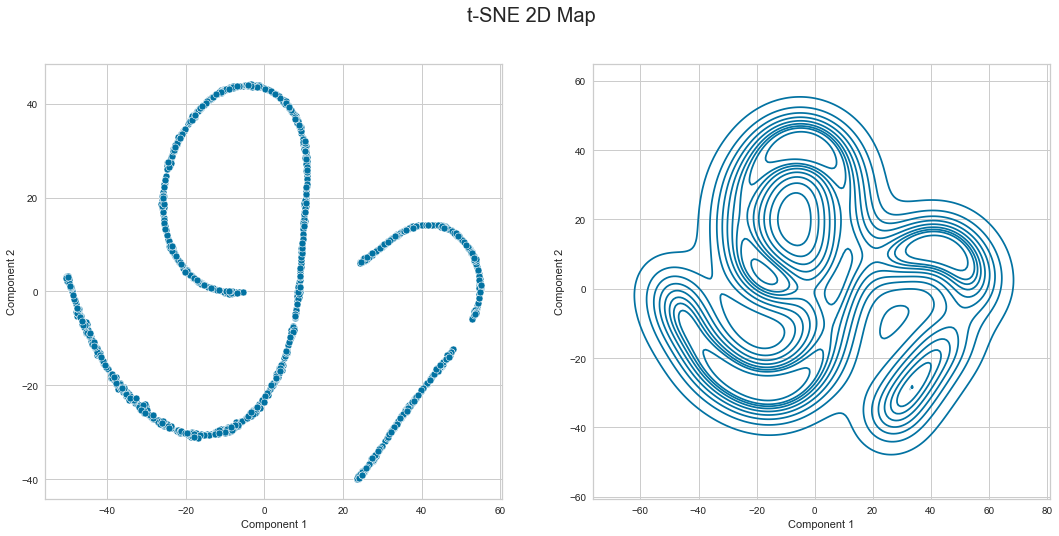

In [41]:
# t-SNE 2D map
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', ax=ax[0])
sns.kdeplot(data=tsne_df, x='Component 1', y='Component 2', ax=ax[1])
fig.suptitle('t-SNE 2D Map', fontsize=20)
plt.show()

# KMEANS

In [44]:
from sklearn.cluster import KMeans

In [42]:
df_pca

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0     2.822119  2.931919  0.091697 -0.889433  0.289518  1.384394 -0.259261   
1    -0.542572 -1.441726  0.028204  1.909370  1.503447 -1.527295 -0.514300   
2     3.403457 -1.051559 -0.417204 -1.399849  0.742550  1.286229 -0.588574   
3    -0.412685  0.606508 -1.790412  1.928900  0.631392 -1.861437 -0.426264   
4     0.025787 -1.763179 -0.328096 -1.580680 -0.312794 -1.699890 -0.134640   
...        ...       ...       ...       ...       ...       ...       ...   
1465  0.232992 -1.713632 -0.113039  1.660681  0.695469 -2.150013 -0.624885   
1466 -1.035661 -1.273688  0.214410 -1.205093  0.878099 -0.713289 -0.048905   
1467 -0.517275 -1.508464 -0.132909 -1.220885  0.379204 -1.160668 -0.344070   
1468 -0.306053  0.336124  2.255435  1.876958  0.620314 -1.400957 -0.461479   
1469 -0.628774 -1.472393  0.084408 -1.225831  0.082063 -1.144649 -0.529672   

          PCA8      PCA9  
0     0.564393 -1.354377  
1    -1.090454 -0.368921  
2    -0.243366  0.278494  
3    -1.349436 -0.066869  
4    -0.662266 -0.022894  
...        ...       ...  
1465 -0.854131 -0.993405  
1466 -0.369014  0.163557  
1467 -0.046044  0.281762  
1468 -1.093215 -1.031258  
1469 -0.565172  0.459978  

[1470 rows x 9 columns]

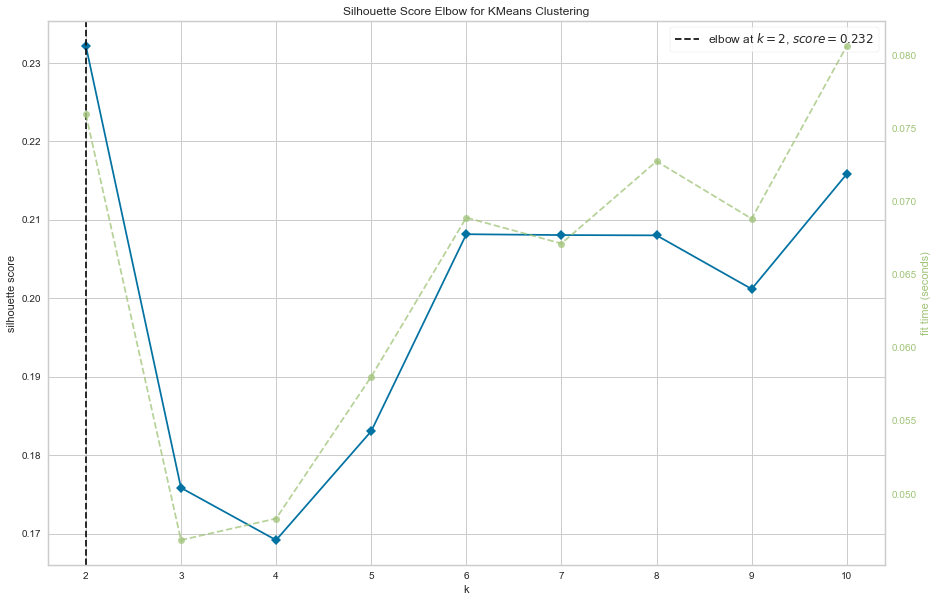

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [45]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', size=(1080, 720))
visualizer.fit(df_pca)
visualizer.show() 

In [ ]:
# using pca

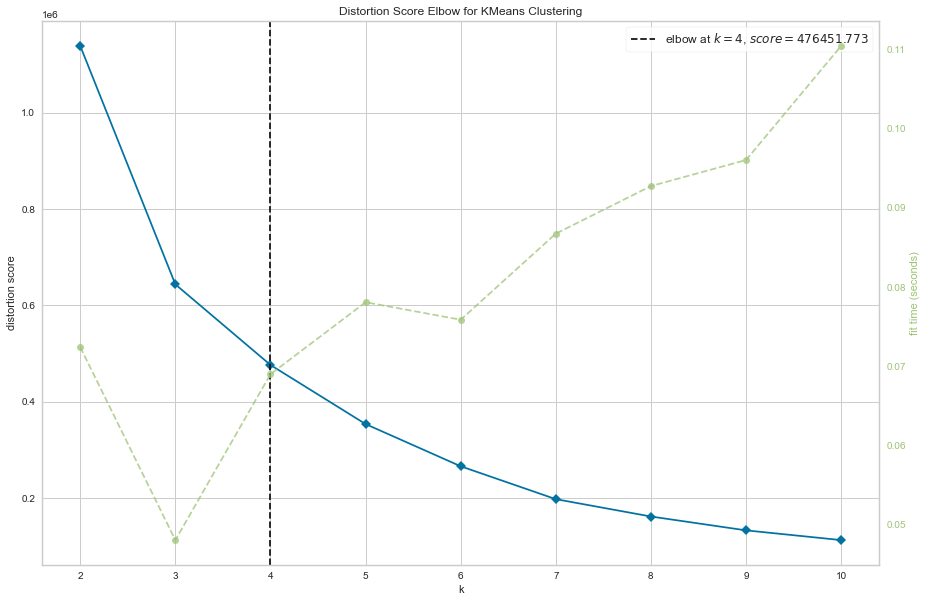

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), size=(1080, 720))
visualizer.fit(tsne_df)
visualizer.show() 

In [ ]:
# using tsne

In [47]:
for k in range(2, 10):
    model = KMeans(n_clusters=k).fit(d)
    label = model.labels_
    sil_coeff = silhouette_score(d, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k,sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.175
For n_clusters=3, The Silhouette Coefficient is 0.129
For n_clusters=4, The Silhouette Coefficient is 0.119
For n_clusters=5, The Silhouette Coefficient is 0.137
For n_clusters=6, The Silhouette Coefficient is 0.120
For n_clusters=7, The Silhouette Coefficient is 0.114
For n_clusters=8, The Silhouette Coefficient is 0.115
For n_clusters=9, The Silhouette Coefficient is 0.117


The highest score comes from n_clusters: 2


Text(0.5, 1.0, 'Silhouette Plot')

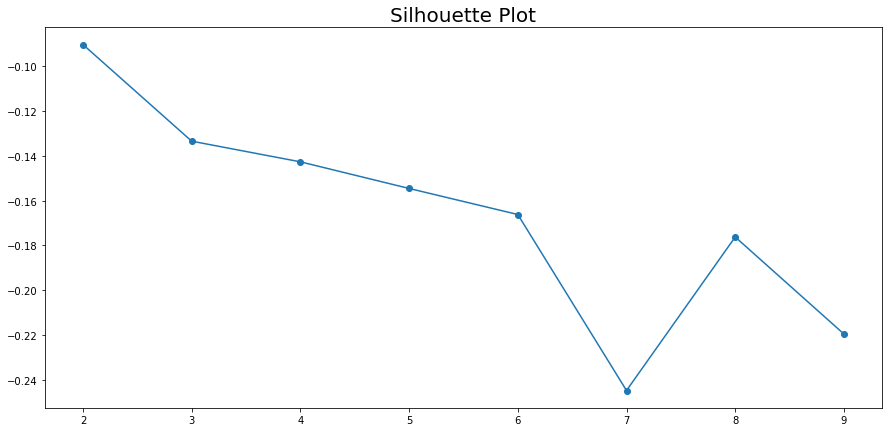

In [50]:
#Silhouette Plot
from sklearn.cluster import KMeans
sil_arr = []
for i in range(2, 10):
    kmeans = KMeans(algorithm='elkan',
                              init='k-means++', max_iter=500, n_clusters=i).fit(df_pca)
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    sil_arr.append(silhouette_avg)
    highest_score = max(sil_arr)
    highest_score_index = sil_arr.index(highest_score)

print('The highest score comes from n_clusters:', highest_score_index+2)
plt.figure(figsize=(15,7))
plt.plot(np.arange(2, 10), sil_arr, 'o-')
plt.title('Silhouette Plot', fontsize=20)

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import calinski_harabasz_score


results_table = {
    'Name': [],
    'Silhouette Score': [],
    'Rand Score': [],
    'Adjusted Rand Score': [],
    'Calinski-Harabasz Score': [],
    'Davies-Bouldin Score': []
}

KMeansEval = Pipeline(
    steps=[
        ('clustering', KMeans(algorithm='elkan',
                              init='k-means++', max_iter=500, n_clusters=10))
    ]
)

KMeansEval.fit(df_pca)
labels = KMeansEval.predict(df_pca)
labels_pred = KMeansEval.predict(df_pca)


results_table['Silhouette Score'].append(silhouette_score(df_pca, labels))
results_table['Rand Score'].append(rand_score(labels, labels_pred))
results_table['Adjusted Rand Score'].append(adjusted_rand_score(labels, labels_pred))
results_table['Calinski-Harabasz Score'].append(calinski_harabasz_score(df_pca, labels))
results_table['Davies-Bouldin Score'].append(davies_bouldin_score(df_pca, labels))
results_table['Name'].append('K Means Clustering')

pd.DataFrame(results_table)

Name  Silhouette Score  Rand Score  Adjusted Rand Score  \
0  K Means Clustering          0.207844         1.0                  1.0   

   Calinski-Harabasz Score  Davies-Bouldin Score  
0               186.364594              1.448172

In [56]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca)
    distortions.append(kmeanModel.inertia_)

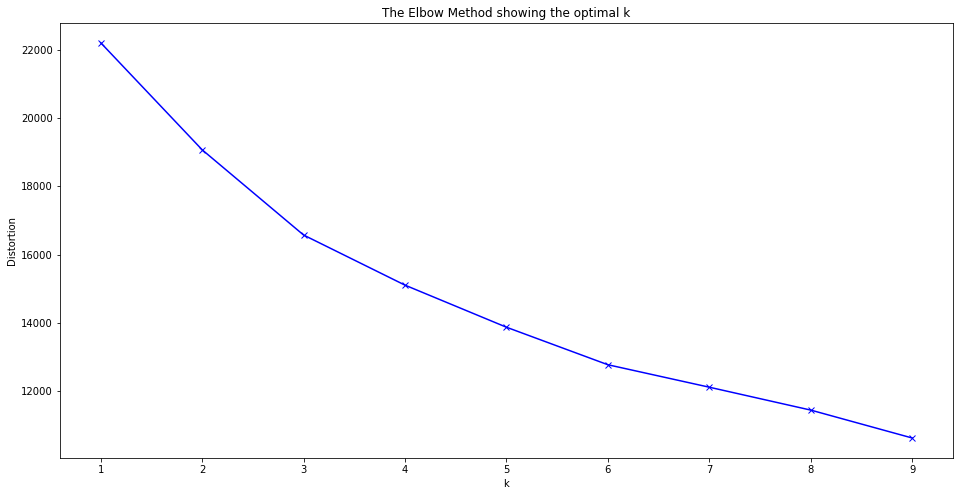

In [57]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [92]:
import matplotlib.cm as cm
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = np.arange(2,15)
def silhouette_plot(df, range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(df)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(df, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) 
        ax2.scatter(
            df[:, 0], df[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.23218079170455144
For n_clusters = 3 The average silhouette_score is : 0.18500335261978568
For n_clusters = 4 The average silhouette_score is : 0.17712578295539186
For n_clusters = 5 The average silhouette_score is : 0.18272913310827457
For n_clusters = 6 The average silhouette_score is : 0.1881846476000934
For n_clusters = 7 The average silhouette_score is : 0.20754940591960266
For n_clusters = 8 The average silhouette_score is : 0.20425572496798275
For n_clusters = 9 The average silhouette_score is : 0.20015813974668117
For n_clusters = 10 The average silhouette_score is : 0.1998139200982268
For n_clusters = 11 The average silhouette_score is : 0.2281023889628923
For n_clusters = 12 The average silhouette_score is : 0.22661638471424028
For n_clusters = 13 The average silhouette_score is : 0.2386515296229637
For n_clusters = 14 The average silhouette_score is : 0.25150295673353495


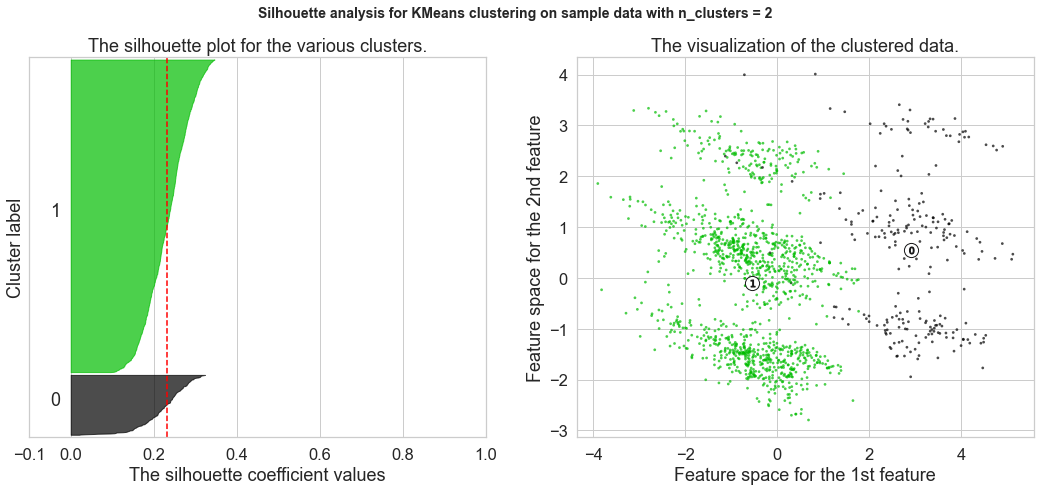

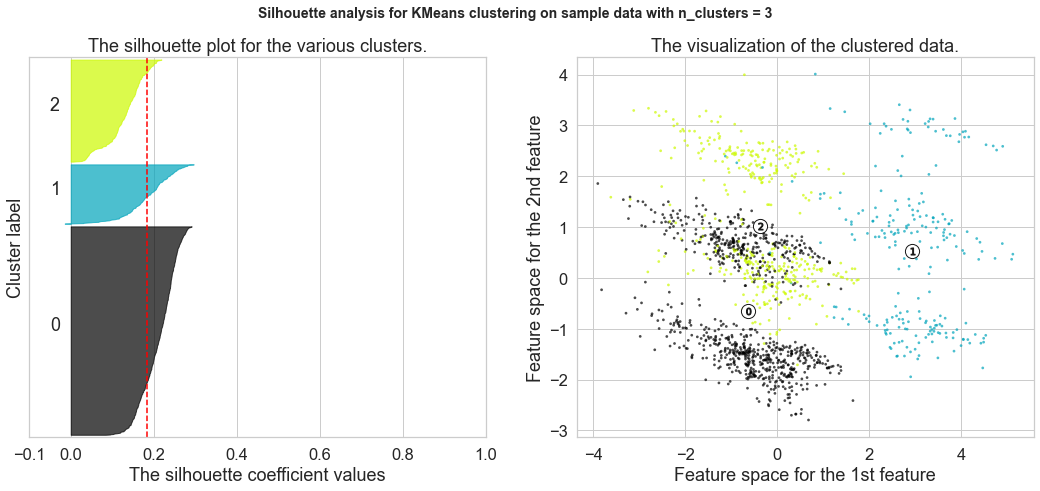

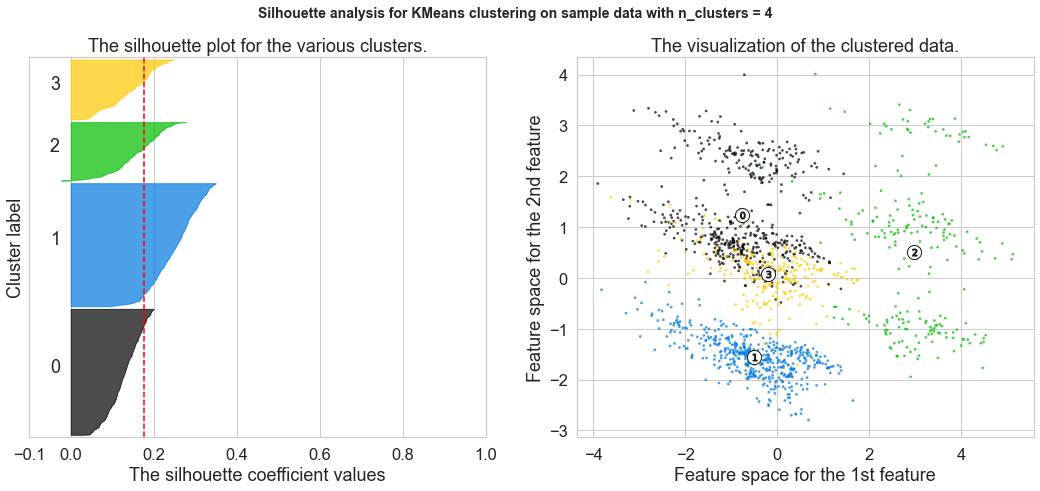

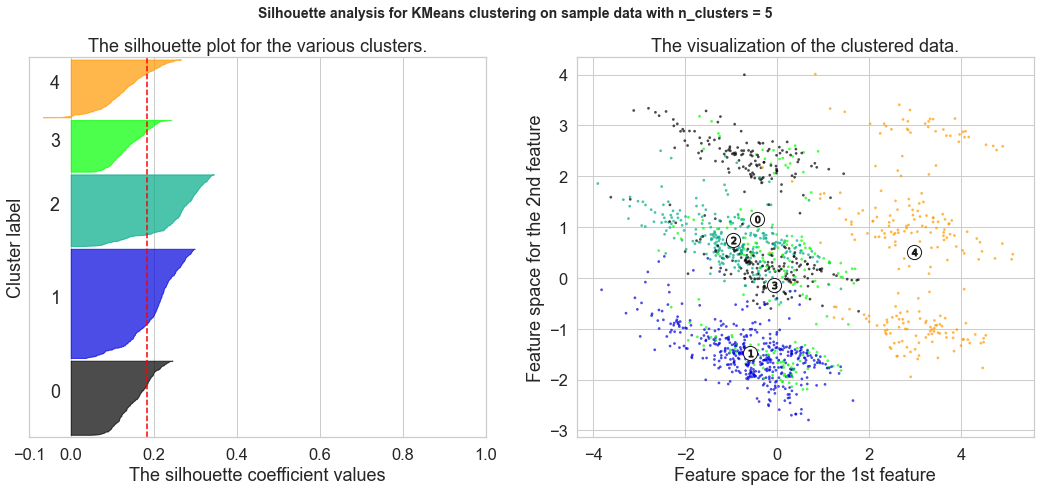

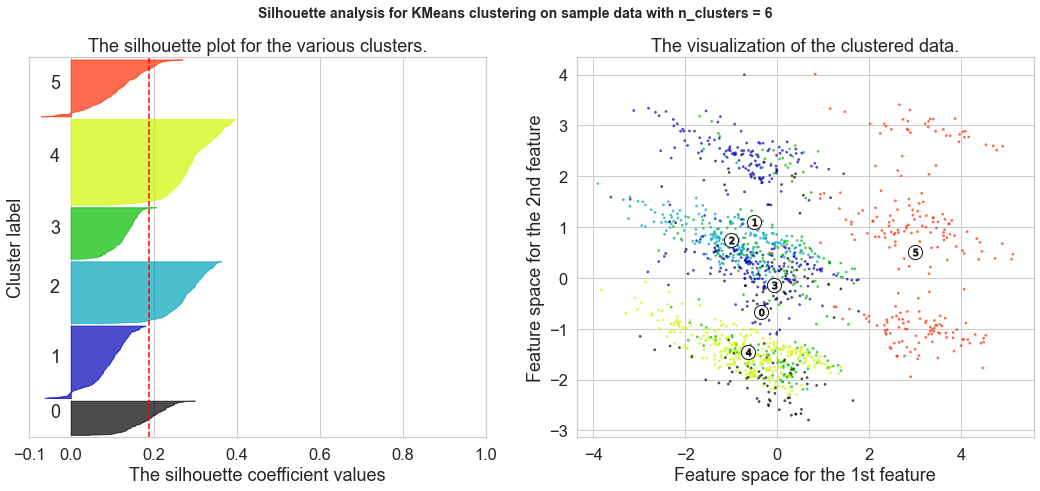

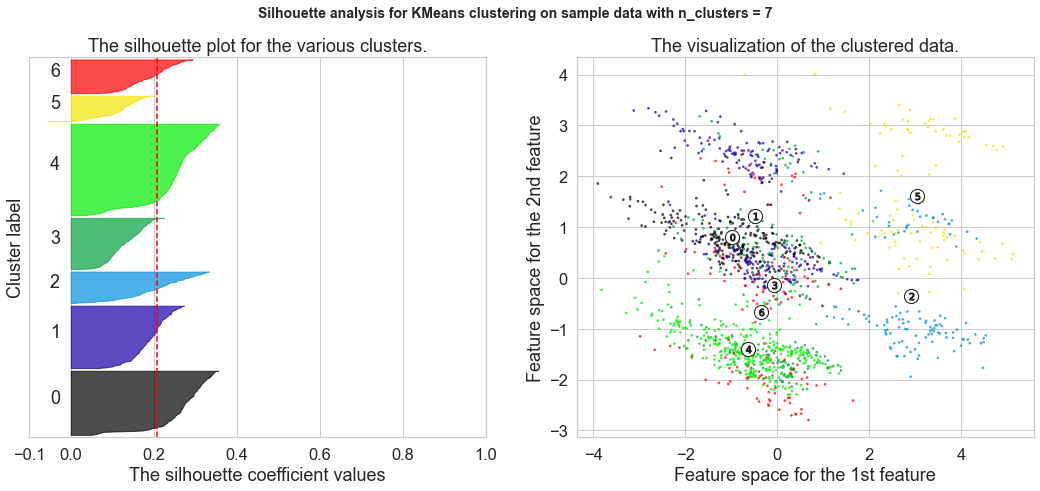

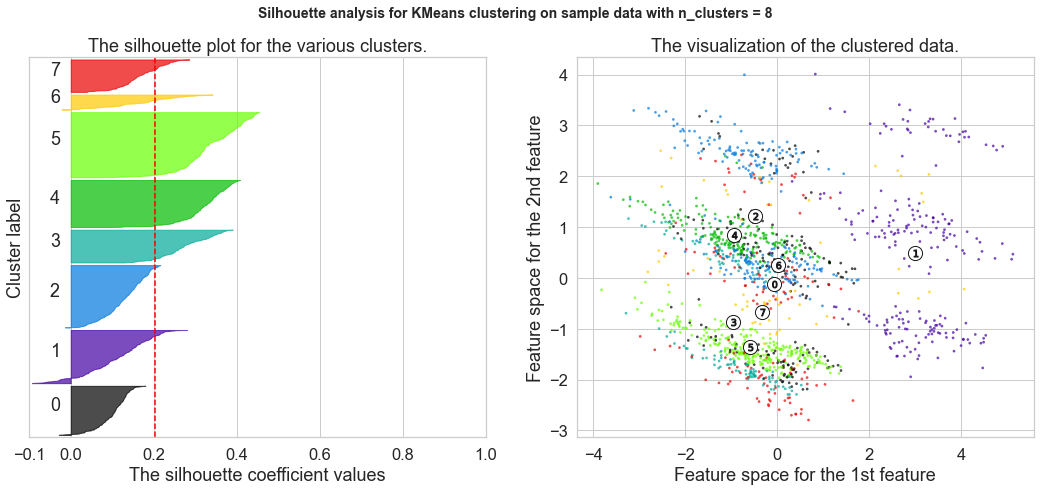

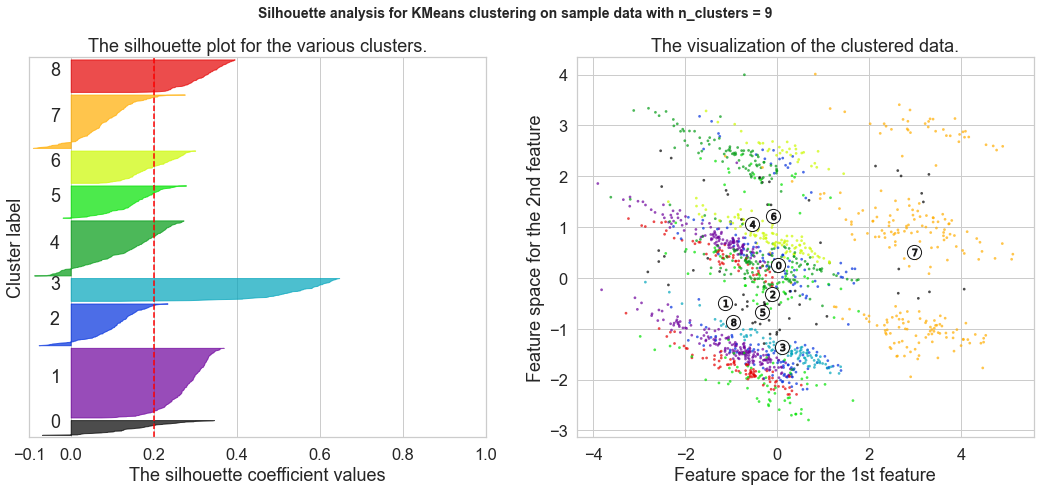

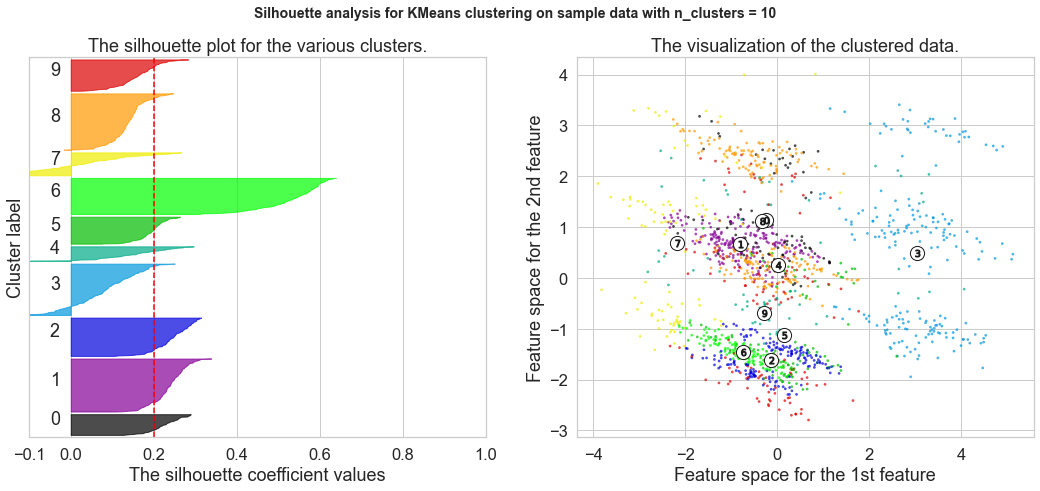

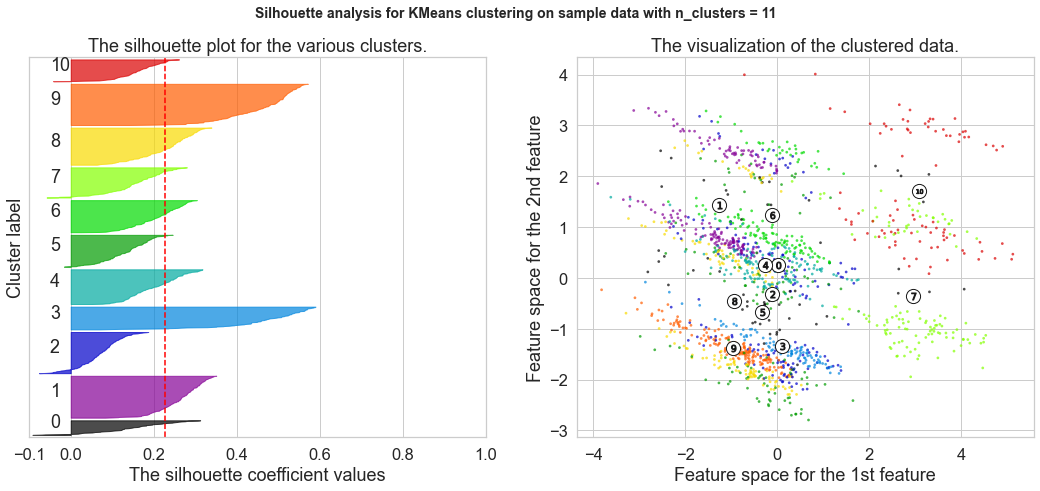

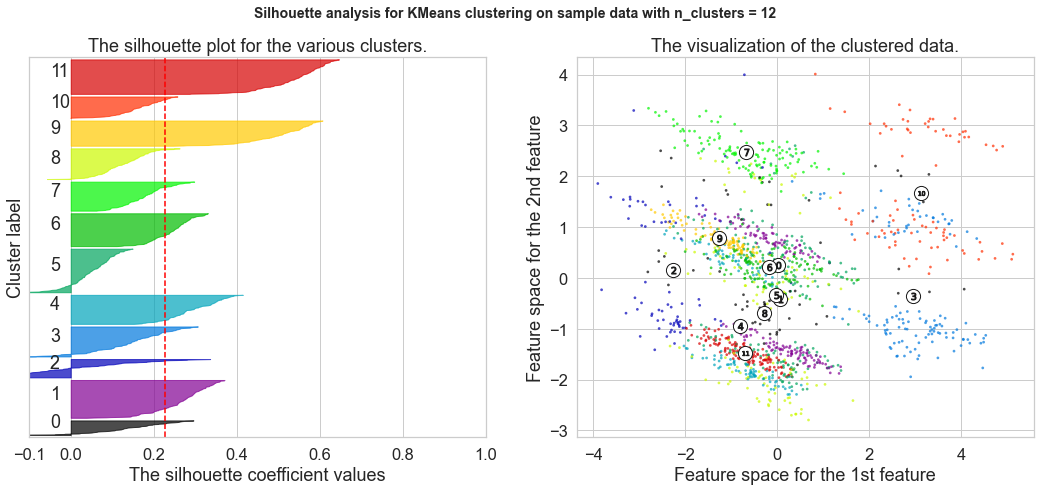

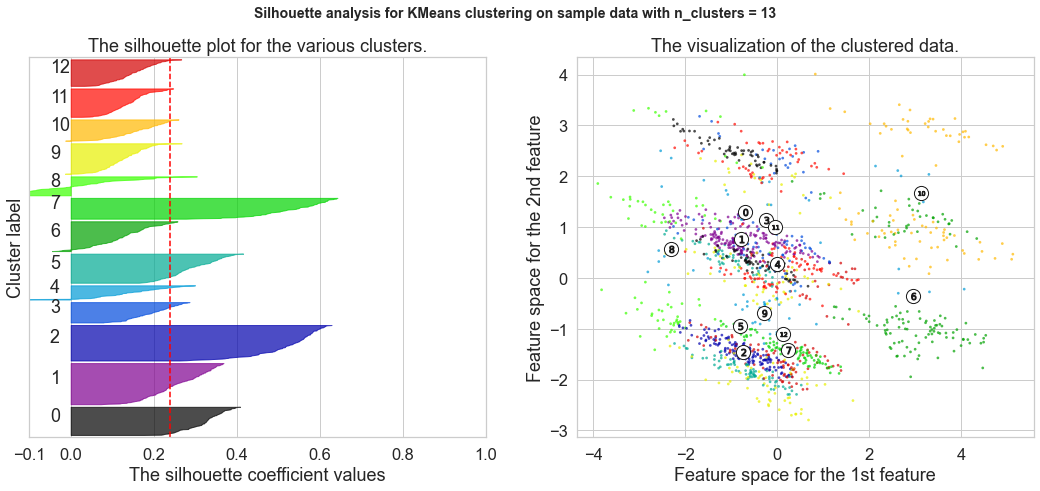

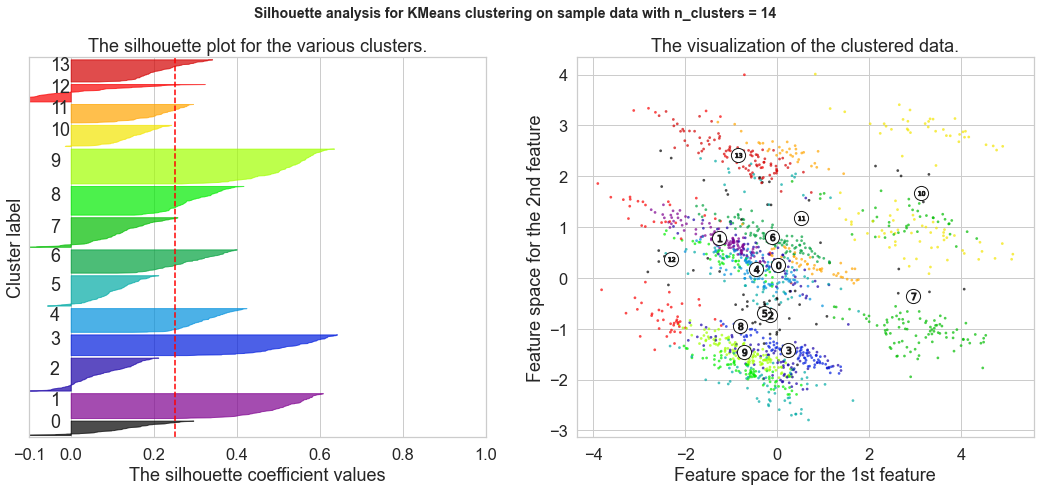

In [93]:
silhouette_plot(p_comps, range_n_clusters)

# HIERARCHICAL CLUSTERING

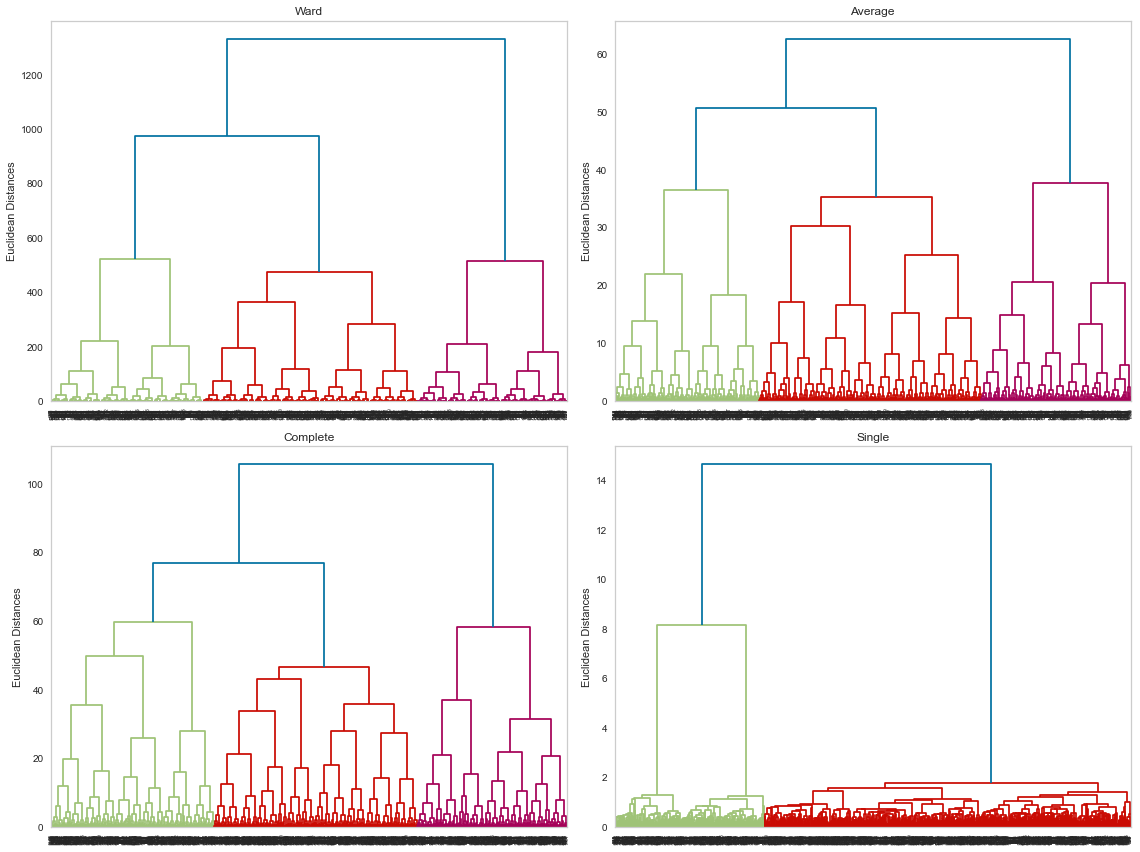

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_methods = ['Ward', 'Average', 'Complete', 'Single']

fig = plt.figure(figsize=(16, 12), tight_layout=True)

for i, method in enumerate(linkage_methods):
    link = linkage(tsne_df, method=method.lower())
    
    ax = fig.add_subplot(220 + i + 1)
    dendrogram(link, ax=ax, orientation='top', distance_sort='descending')
    
    ax.set_title(method)
    ax.set_ylabel('Euclidean Distances')
    ax.grid(False)

plt.show()

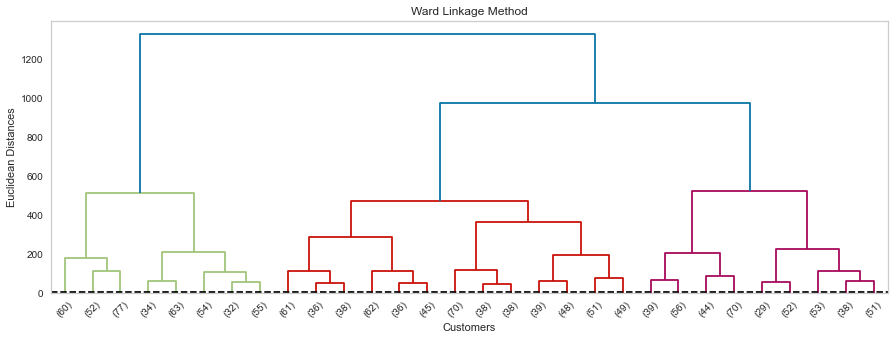

In [57]:
# plot dendrogram
plt.figure(figsize = (15,5))
Z = linkage(tsne_df, method='ward', metric='euclidean')
dendrogram(Z, truncate_mode='lastp', p=30)
# custom
plt.title('Ward Linkage Method')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(linestyle='--', y=1.5, color='black')
plt.grid(False)
plt.show()

## AGGLOMERATIVE CLUSTERING

In [59]:
from sklearn.cluster import AgglomerativeClustering

table = {
    'Cluster No.': [],
    'Silhouette Score': [],
}

for i in range (2,11):
    ac = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    ac.fit(df_pca)
    table['Cluster No.'].append(i)
    table['Silhouette Score'].append(silhouette_score(df_pca, ac.labels_))
    highest_silhouette_score = max(table['Silhouette Score'])
    highest_silhouette_score_index = table['Silhouette Score'].index(highest_silhouette_score)

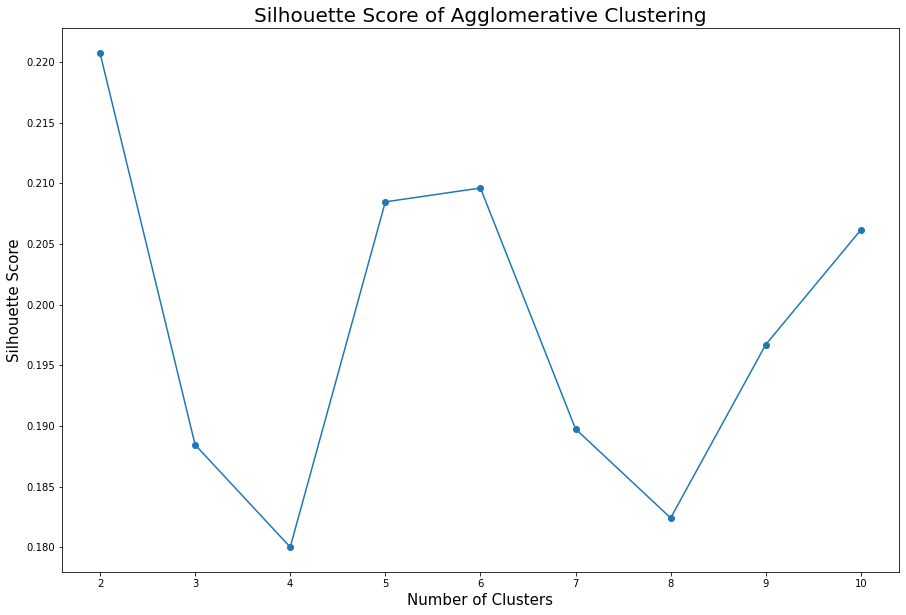

In [70]:
#Lineplot of Silhouette Score
plt.figure(figsize=(15,10))
plt.plot(table['Cluster No.'], table['Silhouette Score'], 'o-')
plt.title('Silhouette Score of Agglomerative Clustering', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Silhouette Score', fontsize=15)
plt.show()

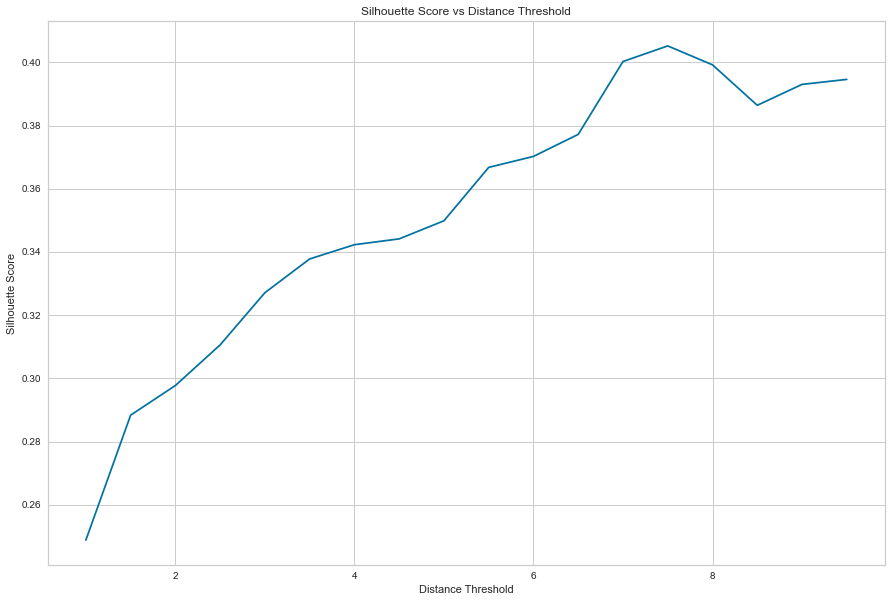

In [60]:
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(15,10))
distance_score={}
for i in np.arange(1, 10, 0.5):
    ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=None, distance_threshold=i).fit(df_pca)
    distance_score[i] = silhouette_score(df_pca, ac.labels_)

pd.Series(distance_score).plot(title='Silhouette Score vs Distance Threshold')
plt.xlabel('Distance Threshold')
plt.ylabel('Silhouette Score')
plt.show()

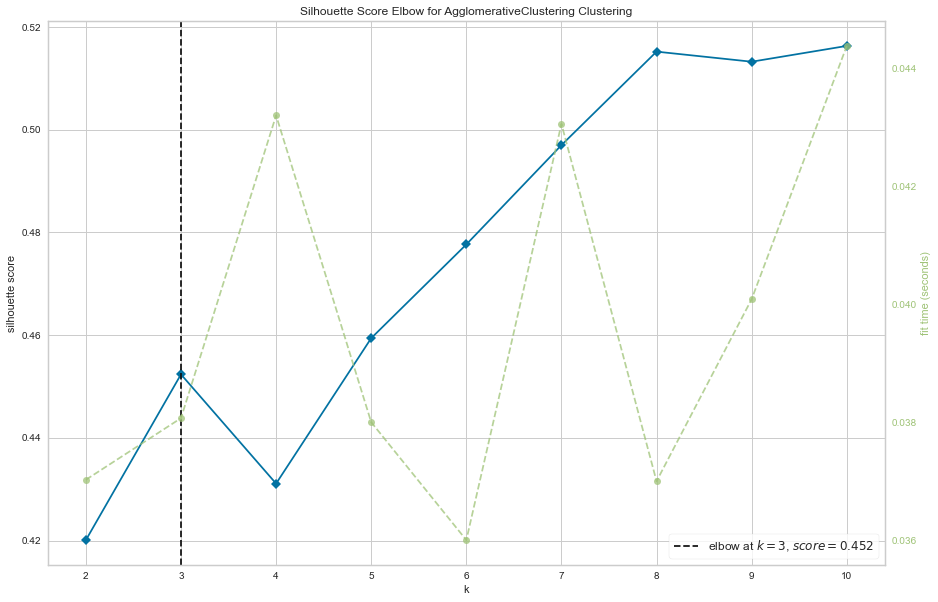

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [52]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', size=(1080, 720))
visualizer.fit(tsne_df)
visualizer.show() 

In [63]:
results_table['Name'].append('Agglomerative Clustering')
results_table['Silhouette Score'].append(silhouette_score(df_pca, ac.labels_))
results_table['Rand Score'].append(rand_score(labels, ac.labels_))
results_table['Adjusted Rand Score'].append(adjusted_rand_score(labels, ac.labels_))
results_table['Calinski-Harabasz Score'].append(calinski_harabasz_score(df_pca, ac.labels_))
results_table['Davies-Bouldin Score'].append(davies_bouldin_score(df_pca, ac.labels_))

pd.DataFrame(results_table)

Name  Silhouette Score  Rand Score  \
0        K Means Clustering          0.207844    1.000000   
1  Agglomerative Clustering          0.394602    0.907138   

   Adjusted Rand Score  Calinski-Harabasz Score  Davies-Bouldin Score  
0             1.000000               186.364594              1.448172  
1             0.319467               148.157339              1.012288

In [65]:
agglo_df = df.copy()
agglo_df['Cluster'] = y_kmeans
agglo_df = pd.get_dummies(agglo_df)
agglo_df

Age  Distance Between Company and Home (KM)  \
0      41                                       1   
1      49                                       8   
2      37                                       2   
3      33                                       3   
4      27                                       2   
...   ...                                     ...   
1465   36                                      23   
1466   39                                       6   
1467   27                                       4   
1468   49                                       2   
1469   34                                       8   

      Education (1 is lowest, 5 is highest)  \
0                                         2   
1                                         1   
2                                         2   
3                                         4   
4                                         1   
...                                     ...   
1465                                      2   
1466                                      1   
1467                                      3   
1468                                      3   
1469                                      3   

      Job Satisfaction (1 is lowest, 4 is highest)  Salary ($)  \
0                                                4        5993   
1                                                2        5130   
2                                                3        2090   
3                                                3        2909   
4                                                2        3468   
...                                            ...         ...   
1465                                             4        2571   
1466                                             1        9991   
1467                                             2        6142   
1468                                             2        5390   
1469                                             3        4404   

      Performance Rating (1 is lowest, 4 is highest)  \
0                                                  3   
1                                                  4   
2                                                  3   
3                                                  3   
4                                                  3   
...                                              ...   
1465                                               3   
1466                                               3   
1467                                               4   
1468                                               3   
1469                                               3   

      Work Life Balance (1 is worst, 4 is best)  Length of Service (Years)  \
0                                             1                          6   
1                                             3                         10   
2                                             3                          0   
3                                             3                          8   
4                                             3                          2   
...                                         ...                        ...   
1465                                          3                          5   
1466                                          3                          7   
1467                                          3                          6   
1468                                          2                          9   
1469                                          4                          4   

      Gender_Female  Gender_Male  ...  BusinessTravel_Travel_Rarely  \
0                 1            0  ...                             1   
1                 0            1  ...                             0   
2                 0            1  ...                             1   
3                 1            0  ...                             0   
4                 0            1  ...         

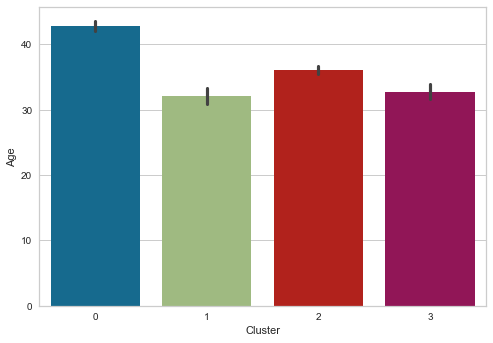

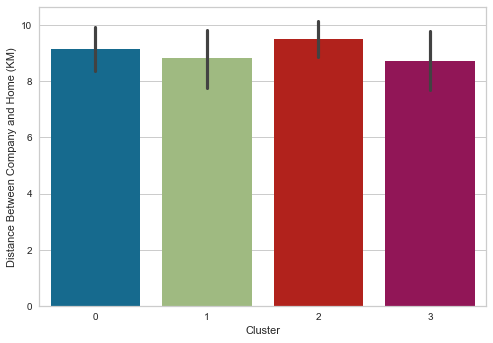

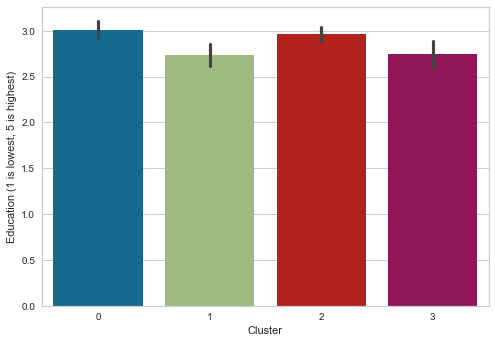

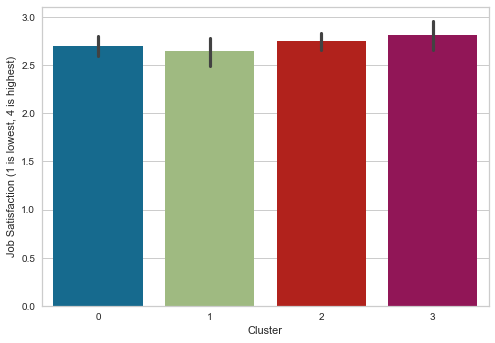

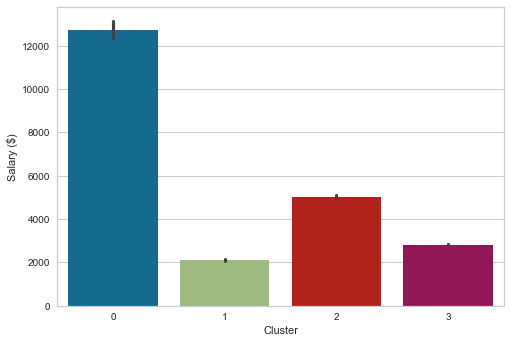

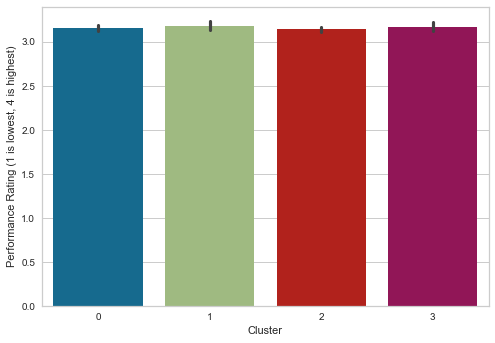

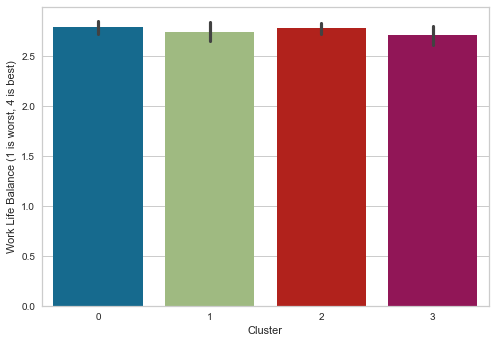

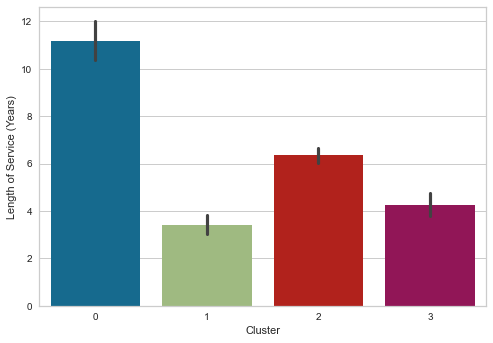

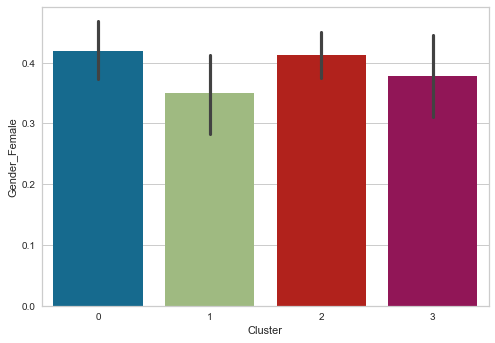

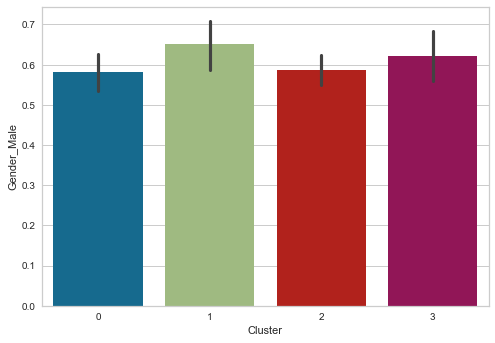

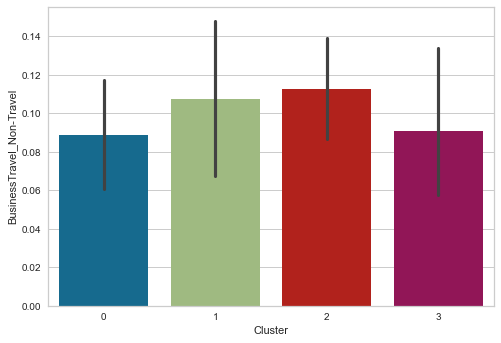

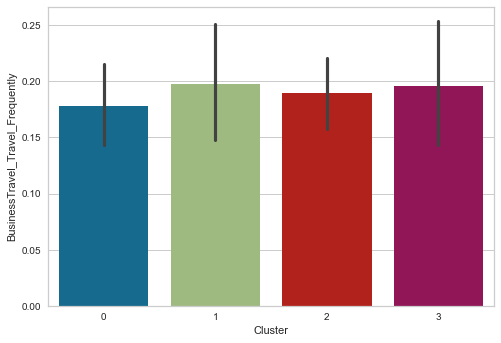

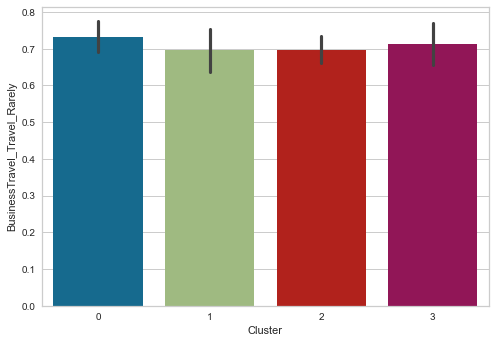

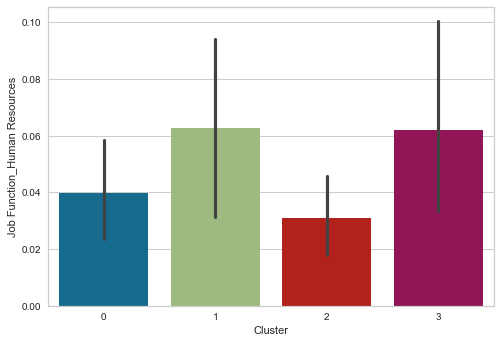

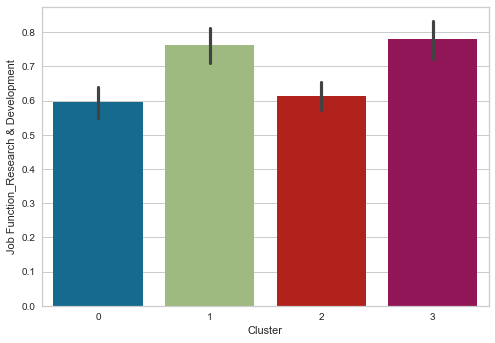

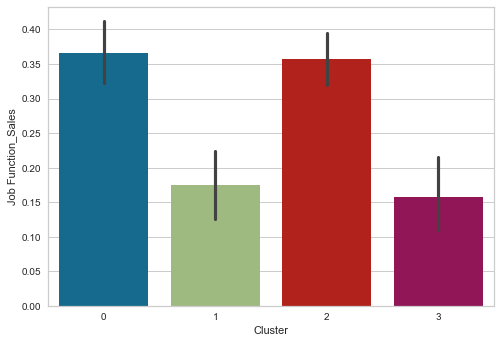

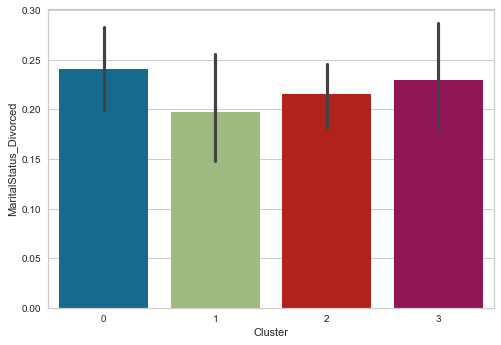

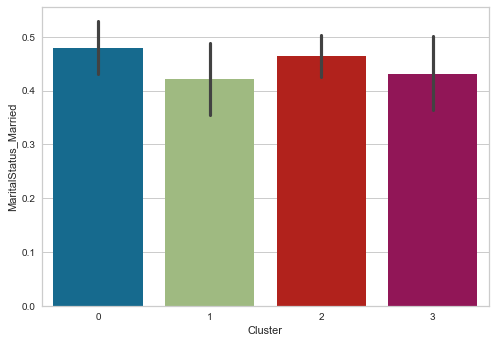

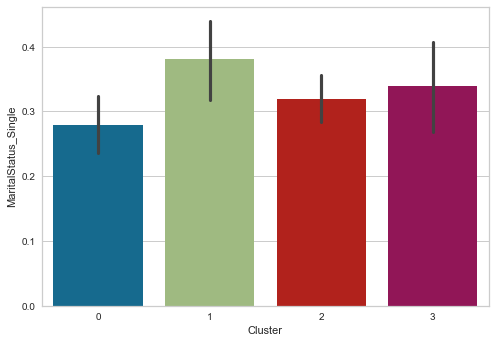

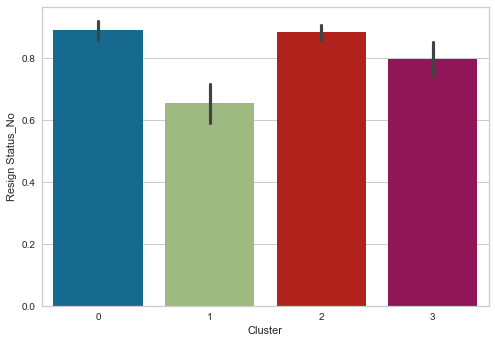

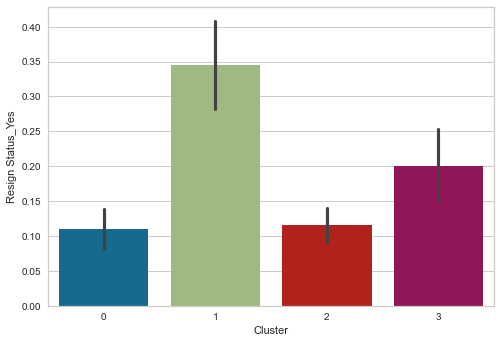

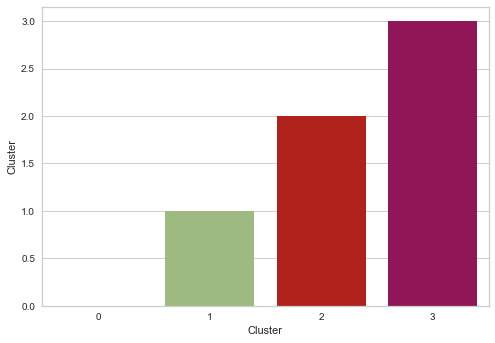

In [66]:
for i, column in enumerate(agglo_df):
    sns.barplot(x=agglo_df["Cluster"], y=agglo_df[f"{column}"])
    plt.show()

In [ ]:
Characterising clusters
We end up with 4 employee clusters, which can be characterised as follows
0) In r&d
1) Travels, married
2) doesnt travel much

To find the employees that are most vulnerable, we look at "Resign Status_Yes". Cluster 1 makes up a high proportion of employees with "Yes" as Resign Status. Other notable characteristics of cluster 1 are these.
1) low salary
2) in research and development